In [1]:
#Import libraries and first look a the data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import defaultdict

df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [3]:
#Percentage of null values 
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

UK_Country                      94.705114
US_State                        82.118674
MiscTechWantToWorkWith          54.432579
PlatformWantToWorkWith          50.120447
ConvertedCompYearly             43.858388
MiscTechHaveWorkedWith          43.605508
CompTotal                       43.452103
WebframeWantToWorkWith          37.565167
PlatformHaveWorkedWith          37.517228
CompFreq                        37.499251
DatabaseWantToWorkWith          30.129795
OrgSize                         27.221084
Currency                        26.796822
YearsCodePro                    26.633828
WebframeHaveWorkedWith          26.045374
ToolsTechWantToWorkWith         21.523508
DevType                         20.320234
SOPartFreq                      19.039058
DatabaseHaveWorkedWith          16.650487
ToolsTechHaveWorkedWith         13.065833
NEWCollabToolsWantToWorkWith    12.484570
Sexuality                       12.072292
LanguageWantToWorkWith           7.931543
MentalHealth                     7

As we can see, there is a lot of features that has a lot of missing values, but we don´t need it for our analsis. For the feature that we need it, we will drop the null values. 

To clean the data for visualization, we create to funtions

In [4]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [5]:
def clean_and_plot(df, column, possible_values, title='Tools', plot=True):
    '''
    INPUT 
        df - a dataframe 
        column - column to perfom the count  
        possible_values - list of values to count 
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    data = df[column].value_counts().reset_index()
    data.rename(columns={'index': 'Option', column: 'count'}, inplace=True)
    count_df = total_count(data, 'Option', 'count', possible_values)

    count_df.set_index('Option', inplace=True)
    if plot:
        
        (count_df/count_df.sum()).plot(kind='bar', legend=None)
        plt.title(title)
        plt.show()
    props_count_df = count_df/count_df.sum()
    return props_count_df
    

### What tools are the most use it?

In [6]:
df_tools = df.dropna(subset = ["ToolsTechHaveWorkedWith"])

In [7]:
possible_vals_tool = ["Ansible", "Chef", "Deno", "Docker", "Flow", "Git", "Kubernetes", "Pulumi", "Puppet", "Terraform", "Unity 3D", "Unreal Engine", "Xamarin", "Yarn", "Other"]

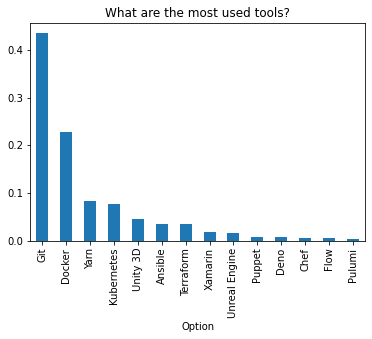

In [8]:
props_df = clean_and_plot(df_tools, "ToolsTechHaveWorkedWith", possible_vals_tool, title = "What are the most used tools?")

### What tools do you want to work with?

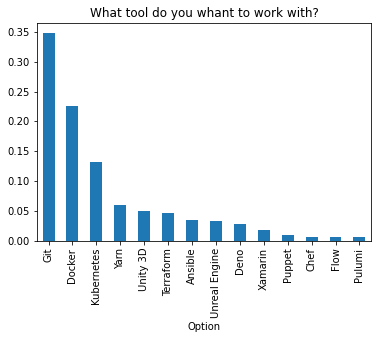

In [9]:
props_df = clean_and_plot(df_tools, "ToolsTechWantToWorkWith", possible_vals_tool, title = "What tool do you whant to work with?")

### What do you do when you get stuck on a problem?

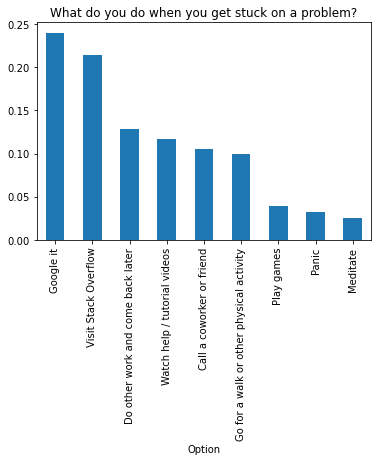

In [10]:
df_stuck = df.dropna(subset = ["NEWStuck"])
possible_values_stuck = ["Watch help / tutorial videos", "Panic", "Play games", "Meditate", "Call a coworker or friend", "Visit Stack Overflow", "Do other work and come back later", "Go for a walk or other physical activity", "Google it"]
props_df = clean_and_plot(df_stuck, "NEWStuck", possible_values_stuck, title = "What do you do when you get stuck on a problem?")

### How did you learn to code?

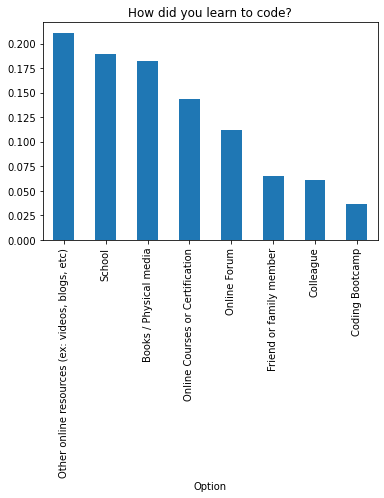

In [11]:
df_learn = df.dropna(subset = ["LearnCode"])
possible_values_stuck = ["Books / Physical media", "Coding Bootcamp", "Friend or family member", "Colleague", "Online Courses or Certification", "Online Forum", "Other online resources (ex: videos, blogs, etc)", "School"]
props_df = clean_and_plot(df_learn, "LearnCode", possible_values_stuck, title = "How did you learn to code?")

There is no much difference between the options, so one conclusion could be that a lot of people dosn´t learn at only one place. Let´s look closer

In [12]:
def count_sep(data, delimiter = ";"):
    return data.count(delimiter) + 1

In [13]:
data_learn = df_learn[["LearnCode"]]

In [14]:
df_learn["count"] = df_learn["LearnCode"].apply(count_sep)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


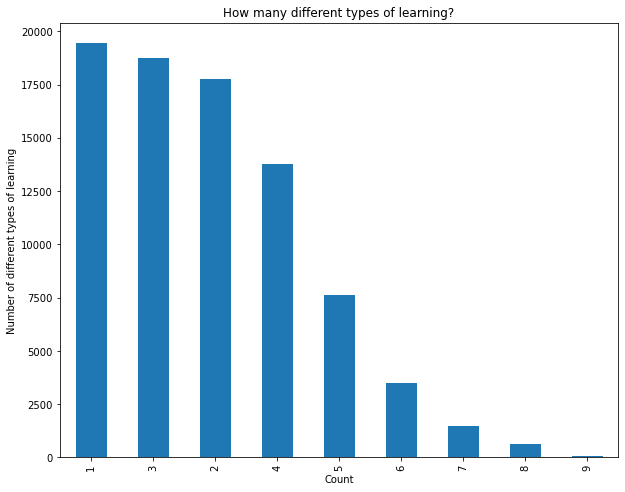

In [15]:
plt.figure(figsize=(10, 8))
df_learn["count"].value_counts().plot(kind = "bar")
plt.title("How many different types of learning?")
plt.xlabel("Count")
plt.ylabel("Number of different types of learning")
plt.show()

Amazing, here we see that a lot of people learn in more that one place